# Data Exploration and Analysis

## Importing libraries

In [1]:
import pandas as pd

## Importing data

In [2]:
df_french = pd.read_csv("Data/french_tweets.csv")
df_langs = pd.read_csv("Data/language_detection_dataset.csv")

### French tweets data

In [3]:
df_french.shape

(900000, 2)

In [4]:
df_french.columns

Index(['label', 'text'], dtype='object')

In [5]:
df_french.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   900000 non-null  int64 
 1   text    900000 non-null  object
dtypes: int64(1), object(1)
memory usage: 13.7+ MB


In [6]:
df_french['label'].value_counts()

label
1    450192
0    449808
Name: count, dtype: int64

<Axes: >

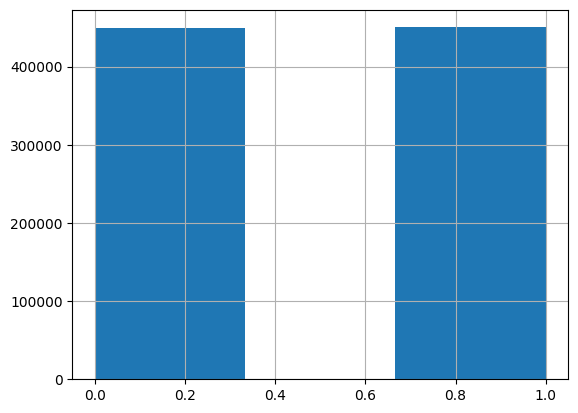

In [7]:
df_french['label'].hist(bins=3)

### Languages data

In [8]:
df_langs.shape

(70000, 2)

In [9]:
df_langs.columns

Index(['lab4', 'text'], dtype='object')

In [10]:
df_langs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lab4    70000 non-null  int64 
 1   text    70000 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


<Axes: >

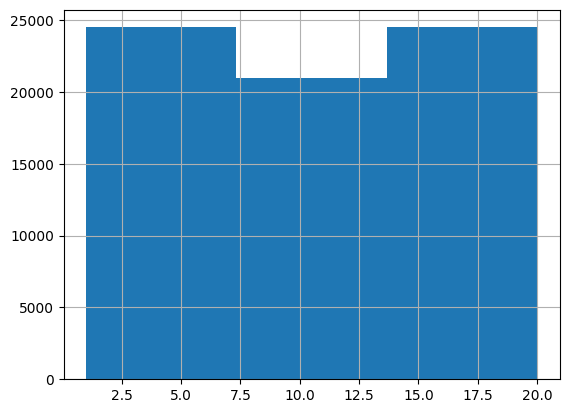

In [11]:
df_langs['lab4'].hist(bins=3)

## Cleaning Data

### French tweets data

In [12]:
df_french.isna().sum()

label    0
text     0
dtype: int64

In [13]:
df_french.duplicated().sum()

25666

In [14]:
df_french = df_french.drop_duplicates(subset=['text'])

In [15]:
df_french.duplicated().sum()

0

In [16]:
df_french = df_french.sample(frac=1).reset_index(drop=True)

In [17]:
df_french.sample(5)

,label,text
299538,0,Eff! Ma performance est nulle! Désolé kak nana -
378323,1,génial! Cd sur le site officiel & quot; leftri...
674926,1,"Omigod, ma voix est si stupide. Je suis tellem..."
614740,1,"Fml, je n'ai plus de téléphone. Oui cassie, je..."
463211,1,Bonne chance au dentiste. Je redoute aussi. J'...


In [18]:
df_french_grouped = df_french.groupby(['label'])
df_french = df_french_grouped.apply(lambda x:x.sample(df_french_grouped.size().min()).reset_index(drop=True))

df_french = df_french.droplevel(['label'])

In [19]:
df_french['label'].value_counts()

label
0    435769
1    435769
Name: count, dtype: int64

### Langs data

In [20]:
df_langs.isna().sum()

lab4    0
text    0
dtype: int64

In [21]:
df_langs.duplicated().sum()

1020

In [22]:
df_langs = df_langs.drop_duplicates(subset=['text'])

In [23]:
df_langs.duplicated().sum()

0

In [24]:
df_langs = df_langs.sample(frac=1).reset_index(drop=True)

In [25]:
df_langs.sample(10)

,lab4,text
13201,6,Producto de bajísima calidad. No sirve para na...
39026,7,Pas reçu la commande...
12511,14,А что такое ти ?
48466,14,В качестве примера лояльности и когда он тольк...
21272,20,本来看到那么多差评就心存疑虑，但出于对亚马逊品牌的名誉的信任，下手了。今天收到亚马逊的5c，...
12735,19,Tôi thật tuyệt vời tôi thích những bộ phim mà ...
5324,19,"À , ngân sách là một chủ đề đau đớn trong gia ..."
52996,8,"फिर भी , ऐ राजा !"
67734,2,"някои доказателства сочат , че wtp да се избег..."
62755,12,"Osoba siedząca na motocyklu, podczas gdy mężcz..."


In [26]:
df_langs['lab4'].value_counts()

lab4
10    3500
5     3499
3     3499
6     3498
7     3495
20    3491
17    3464
2     3464
19    3464
8     3464
1     3464
14    3463
4     3463
16    3463
15    3463
18    3456
13    3350
9     3346
11    3338
12    3334
Name: count, dtype: int64

## Exporting data

In [27]:
df_french.to_csv("Data/analyzed_french_tweets.csv", index=None)

In [28]:
df_langs.to_csv("Data/analyzed_langs_dataset.csv", index=None)